In [60]:
%matplotlib inline

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://nationalregisterofhistoricplaces.com/oh/adams/state.html

In [61]:
datadir = '/Users/klarnemann/Documents/Insight/Project/data'

In [62]:
landmark_df = pd.read_excel('%s/federal_historic_places.xlsx' % (datadir))

In [63]:
landmark_df.shape

(6385, 61)

In [65]:
print(landmark_df.columns)

Index(['Unnamed: 0', 'Ref#', 'Prefix', 'Property Name', 'Status',
       'Request Type', 'Status Date', 'Restricted Address', 'City ', 'County',
       'Federal Agencies', 'Other Names', 'State', 'Street & Number',
       'Air Force', 'Army Corps Of Engineers', 'Bureau Of Indian Affairs',
       'Bureau Of Land Management', 'Bureau Of Mines', 'Bureau Of Reclamation',
       'Coast Guard', 'Department Of Agriculture', 'Department Of Commerce',
       'Department Of Defense', 'Department Of Energy',
       'Department Of Justice', 'Department Of Labor',
       'Department Of The Army', 'Department Of The Interior',
       'Department Of The Navy', 'Department Of The Treasury',
       'Department Of Transportation', 'Economic Development Administration',
       'Farmers Home Administration', 'Federal Aviation Administration',
       'Federal Communications Commission',
       'Federal Deposit Insurance Commission',
       'Federal Highway Administration', 'Fish And Wildlife Service',
    

In [66]:
landmark_df.head(5)

,Unnamed: 0,Ref#,Prefix,Property Name,Status,Request Type,Status Date,Restricted Address,City,County,...,Small Business Administration,Smithsonian Institution,Soil Conservation Service,Space Administration,State Department,Tennessee Valley Authority,U.S. Department Of Agriculture,U.S. Department Of The Interior,U.S. Postal Service,Veterans Administration
0,0,87002178,NaN,Building 800--Austin Hall,Listed,Single,1988-03-02,False,Montgomery,Montgomery,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,87002182,NaN,Building 836--Community College of the Air For...,Listed,Single,1988-03-02,False,Montgomery,Montgomery,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,87002177,NaN,Maxwell Air Force Base Senior Officer's Quarte...,Listed,Single,1988-03-02,False,Montgomery,Montgomery,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,90000933,NaN,Midvale Archeological Site,Listed,Single,1990-06-14,True,Chandler,Maricopa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,95000748,NaN,Ammo Bunker (S-1007),Listed,Multiple,1995-06-19,False,Mesa,Maricopa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


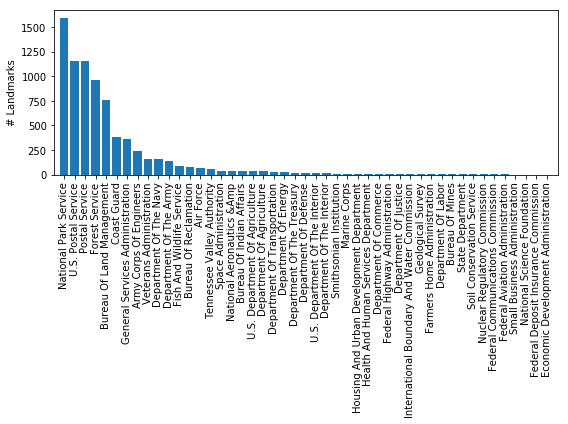

In [67]:
plt.figure(figsize=(8,6))
plt.bar(np.arange(len(agencies)), landmark_df[agencies].sum())
plt.xlim(-1, len(agencies)+0.1)
plt.xticks(np.arange(len(agencies)), agencies, rotation=90);
plt.ylabel('# Landmarks')
plt.tight_layout()
#plt.savefig('/Users/klarnemann/Documents/Insight/Project/docs/figures/landmark_agencies.png', dpi=150)

# Clean

In [3]:
dirty_landmark_df = pd.read_excel('%s/historic_places_federal_listed_20190404.xlsx' % (datadir))

In [6]:
agencies = set()
for item in dirty_landmark_df['Federal Agencies'].unique():
    split_agencies = re.split('; | , | &amp | U.S.', item)
    if len(split_agencies) > 1:
        for sub_item in split_agencies:
            agencies = set.union(agencies, set([sub_item.lstrip().title()]))
    else:
        agencies = set.union(agencies, set([item.lstrip().title()]))
agencies = set.difference(agencies, set(['']))
agencies = list(agencies)
agencies.sort()

In [7]:
columns = list(dirty_landmark_df.columns) + agencies

['Ref#',
 'Prefix',
 'Property Name',
 'Status',
 'Request Type',
 'Status Date',
 'Restricted Address',
 'City ',
 'County',
 'Federal Agencies',
 'Other Names',
 'State',
 'Street & Number',
 'Air Force',
 'Army Corps Of Engineers',
 'Bureau Of Indian Affairs',
 'Bureau Of Land Management',
 'Bureau Of Mines',
 'Bureau Of Reclamation',
 'Coast Guard',
 'Department Of Agriculture',
 'Department Of Commerce',
 'Department Of Defense',
 'Department Of Energy',
 'Department Of Justice',
 'Department Of Labor',
 'Department Of The Army',
 'Department Of The Interior',
 'Department Of The Navy',
 'Department Of The Treasury',
 'Department Of Transportation',
 'Economic Development Administration',
 'Farmers Home Administration',
 'Federal Aviation Administration',
 'Federal Communications Commission',
 'Federal Deposit Insurance Commission',
 'Federal Highway Administration',
 'Fish And Wildlife Service',
 'Forest Service',
 'General Services Administration',
 'Geological Survey',
 'Health

In [13]:
dirty_landmark_df = dirty_landmark_df.reindex(columns=columns)

In [14]:
n_rows, n_cols = dirty_landmark_df.shape

In [32]:
for row in np.arange(n_rows):
    for agency in agencies:
        if agency.lower() in dirty_landmark_df.loc[row, 'Federal Agencies'].lower():
            dirty_landmark_df.loc[row, agency] = 1

In [30]:
agencies[3].lower() in dirty_landmark_df.loc[row, 'Federal Agencies'].lower()

True

In [49]:
agencies = [x for _, x in sorted(zip(dirty_landmark_df[agencies].sum(),agencies), reverse=True)]